In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import os
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
import os
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D  
from keras.optimizers import SGD  
from keras import regularizers
import numpy as np
from keras.backend.tensorflow_backend import set_session
import tensorflow as tf
config = tf.ConfigProto()  
config.gpu_options.allow_growth = True  
config.gpu_options.per_process_gpu_memory_fraction = 0.8
set_session(tf.Session(config=config)) 
print('configed')

Using TensorFlow backend.


configed


In [28]:

img_width, img_height = 224, 224
train_data_dir = 'D:\\EE628\\final_dogs&cats\\data\\train'
validation_data_dir = 'D:\\EE628\\final_dogs&cats\\data\\validation'
predict_data_dir = 'D:\\EE628\\final_dogs&cats\\data\\test\\test\\'
path_folder='D:\\EE628\\final_dogs&cats\\Training\\'
epochs = 100
batch_size = 128

nb_train_samples = 16666
nb_validation_samples = 8334
import h5py
with h5py.File(path_folder+"vgg16_features.h5", 'r') as h:
    train_data = np.array(h['train'])
    validation_data = np.array(h['validation'])
    train_labels = np.array(h["label_train"])
    validation_labels = np.array(h["label_validation"])

print('Features loaded')
print(train_data.shape, validation_data.shape, train_labels.shape, validation_labels.shape)

Features loaded
(16666, 7, 7, 512) (8334, 7, 7, 512) (16666,) (8334,)


In [33]:
from keras import regularizers
del model

model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu',
                kernel_regularizer=regularizers.l2(0.0005)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid',
                kernel_regularizer=regularizers.l2(0.0005)))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', metrics=['accuracy'])

hist_top=model.fit(train_data, train_labels,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(validation_data, validation_labels))

Train on 16666 samples, validate on 8334 samples
Epoch 1/100
16666/16666 [==============================] - 3s 169us/step - loss: 1.7122 - acc: 0.7485 - val_loss: 0.6220 - val_acc: 0.7683
Epoch 2/100
16666/16666 [==============================] - 2s 141us/step - loss: 0.4668 - acc: 0.8366 - val_loss: 0.2945 - val_acc: 0.8992
Epoch 3/100
16666/16666 [==============================] - 2s 141us/step - loss: 0.3652 - acc: 0.8705 - val_loss: 0.3859 - val_acc: 0.8638
Epoch 4/100
16666/16666 [==============================] - 2s 141us/step - loss: 0.3254 - acc: 0.8862 - val_loss: 0.3118 - val_acc: 0.8866
Epoch 5/100
16666/16666 [==============================] - 2s 143us/step - loss: 0.3104 - acc: 0.8967 - val_loss: 0.3137 - val_acc: 0.8907
Epoch 6/100
16666/16666 [==============================] - 2s 142us/step - loss: 0.2939 - acc: 0.9009 - val_loss: 0.3014 - val_acc: 0.9034
Epoch 7/100
16666/16666 [==============================] - 2s 141us/step - loss: 0.2941 - acc: 0.9008 - val_loss: 0.2

In [16]:
model.summary()

model.save_weights(path_folder+'3_1_top_weight_of.h5')
print('Weight saved')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 6,423,041
Trainable params: 6,423,041
Non-trainable params: 0
_________________________________________________________________


In [12]:
hist_top.history.keys()

dict_keys(['val_loss', 'loss', 'val_acc', 'acc'])

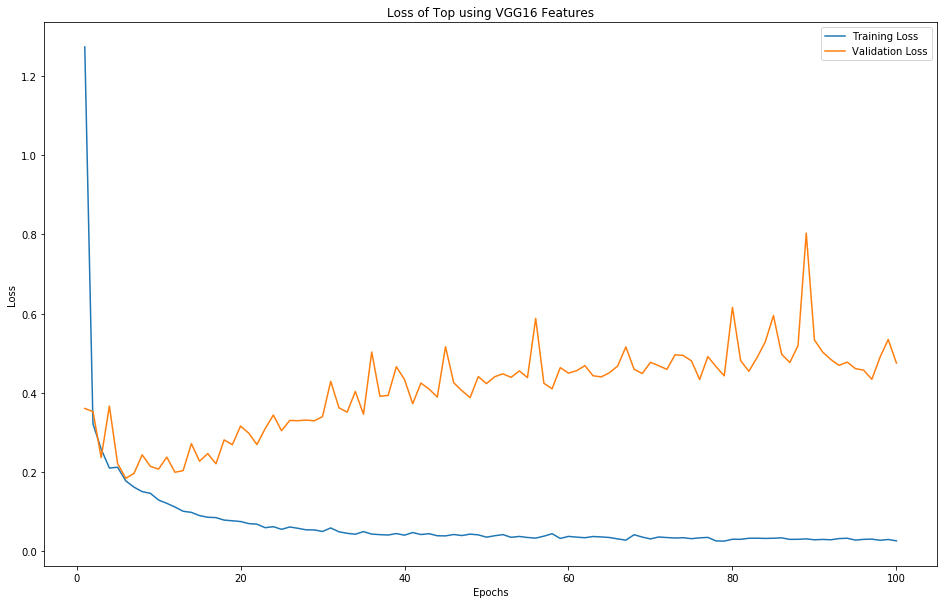

Plot saved


In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10)) 
epochs = range(1, len(hist_top.history['acc']) + 1)
plt.plot(epochs, hist_top.history['loss'], label='Training Loss') 
plt.plot(epochs, hist_top.history['val_loss'], label='Validation Loss') 

plt.title('Loss of Top using VGG16 Features')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(path_folder+'3_1_loss_top_of.jpg')
plt.show()
print('Plot saved')

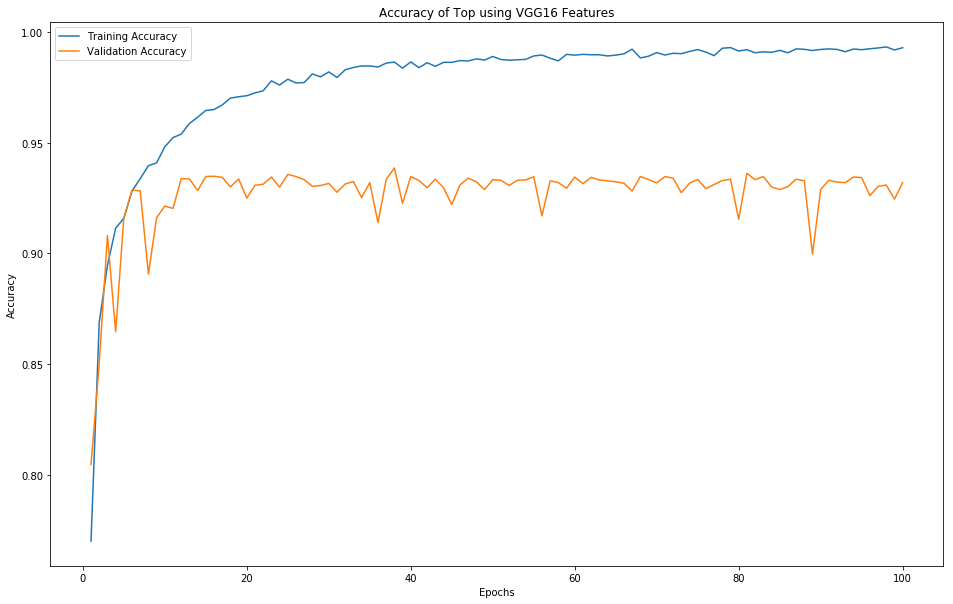

Plot saved


In [14]:
plt.figure(figsize=(16,10)) 
epochs = range(1, len(hist_top.history['acc']) + 1)
plt.plot(epochs, hist_top.history['acc'], label='Training Accuracy') 
plt.plot(epochs, hist_top.history['val_acc'], label='Validation Accuracy') 
plt.title('Accuracy of Top using VGG16 Features')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(path_folder+'3_1_acc_top_of.jpg')
plt.show()
print('Plot saved')